# **Análisis de Variables Categóricas 📊**

En este notebook analizaremos el comportamiento de las variables cualitativas del Hospital San Carlos. El objetivo es identificar patrones visuales y confirmar la magnitud del desbalanceo de clases antes de proceder al modelado.

### **1. Configuración y Carga**
Primero, preparamos el entorno con las librerías de visualización seaborn y matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset limpio generado en el paso anterior
df = pd.read_csv('dataset/healthcare-dataset-stroke-clean.csv')

# Definimos el estilo visual
sns.set_theme(style="whitegrid")

# Vemos las primeras filas del DataFrame
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **Distribución de la Variable Objetivo (Stroke)**
Como observamos en el conteo previo, la clase está altamente desbalanceada. Visualizarlo nos ayuda a dimensionar el reto para el algoritmo.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\3172533922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='stroke', palette='viridis')


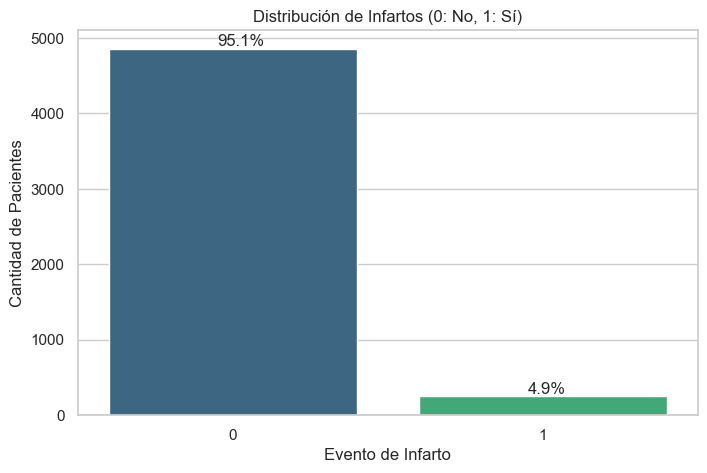

In [3]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='stroke', palette='viridis')
plt.title('Distribución de Infartos (0: No, 1: Sí)')
plt.xlabel('Evento de Infarto')
plt.ylabel('Cantidad de Pacientes')

# Añadir etiquetas de porcentaje sobre las barras
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size = 12, va='bottom')

plt.show()

### **Análisis de Perfil Poblacional (Univariado)**
Antes de analizar la incidencia de infartos, realizamos un diagnóstico de la composición de nuestra muestra. Este paso nos permite identificar si existe un sesgo en la recolección de datos (por ejemplo, si el hospital atiende predominantemente a un sector laboral o a un género específico).

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


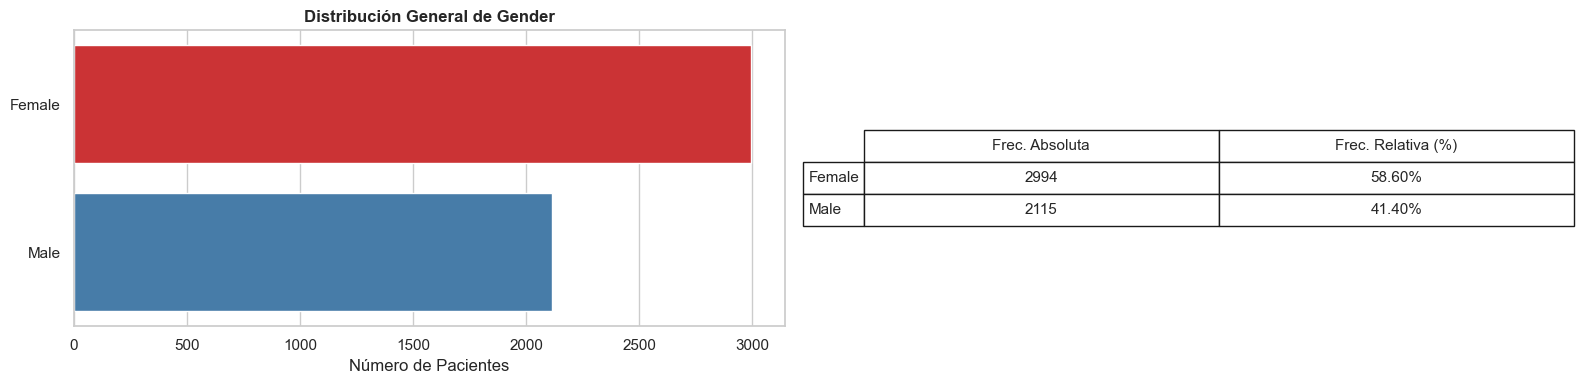

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


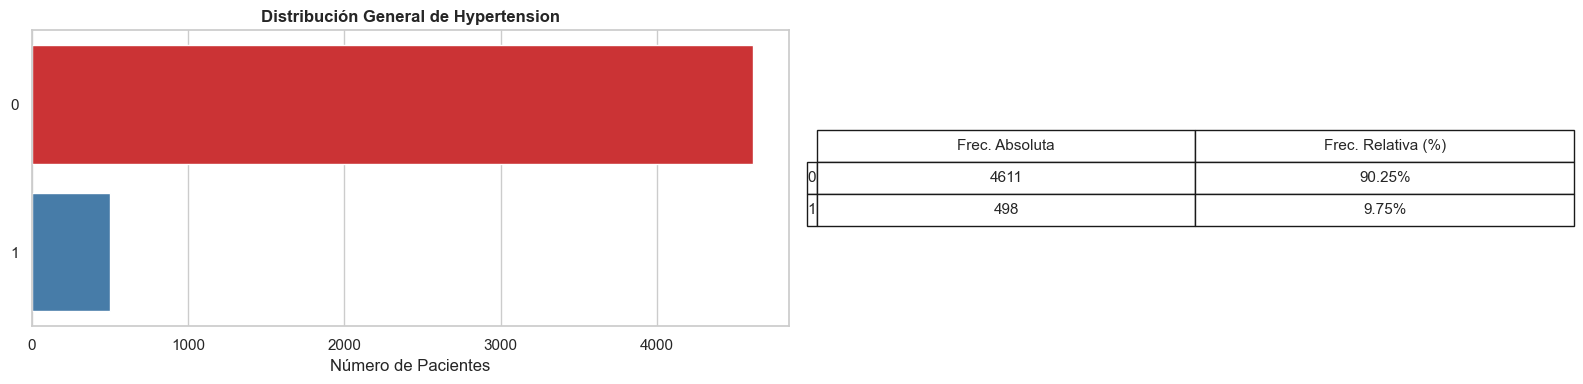

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


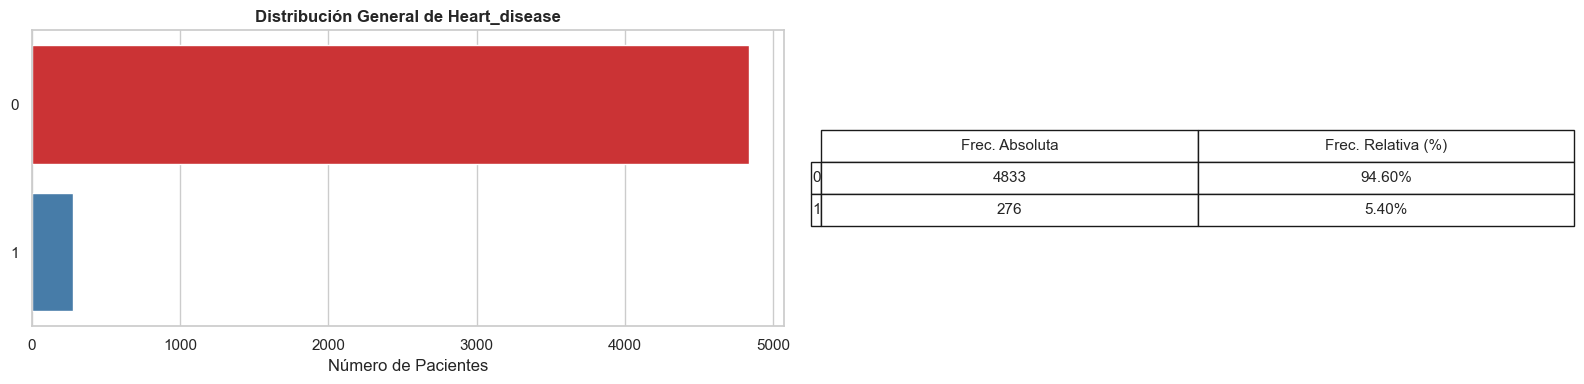

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


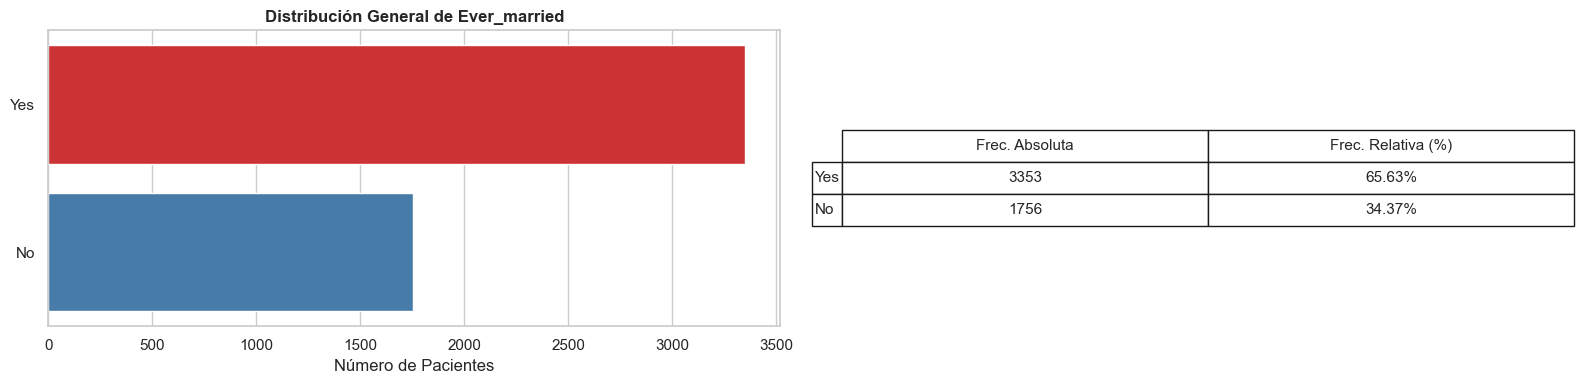

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


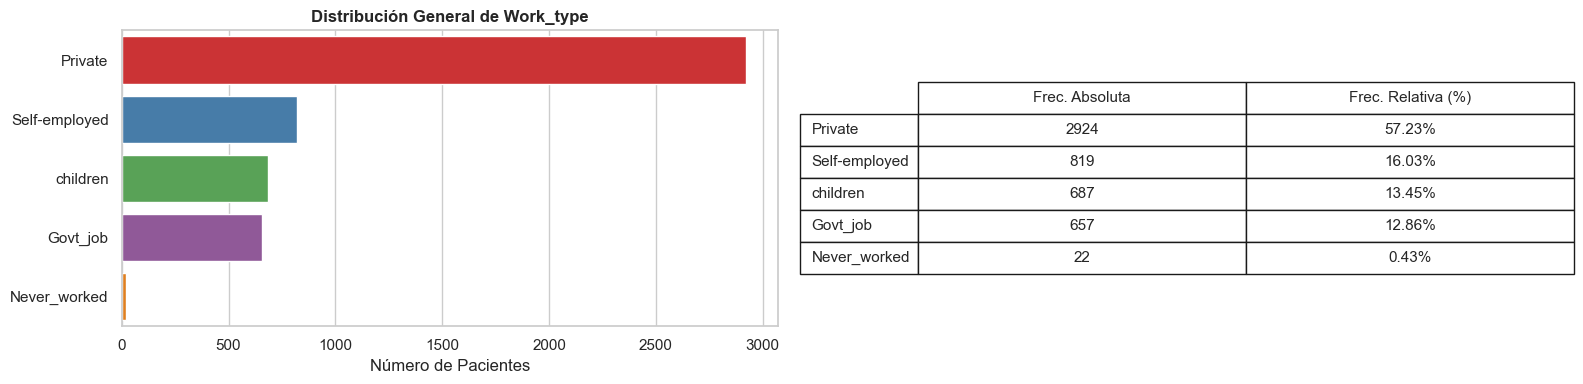

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


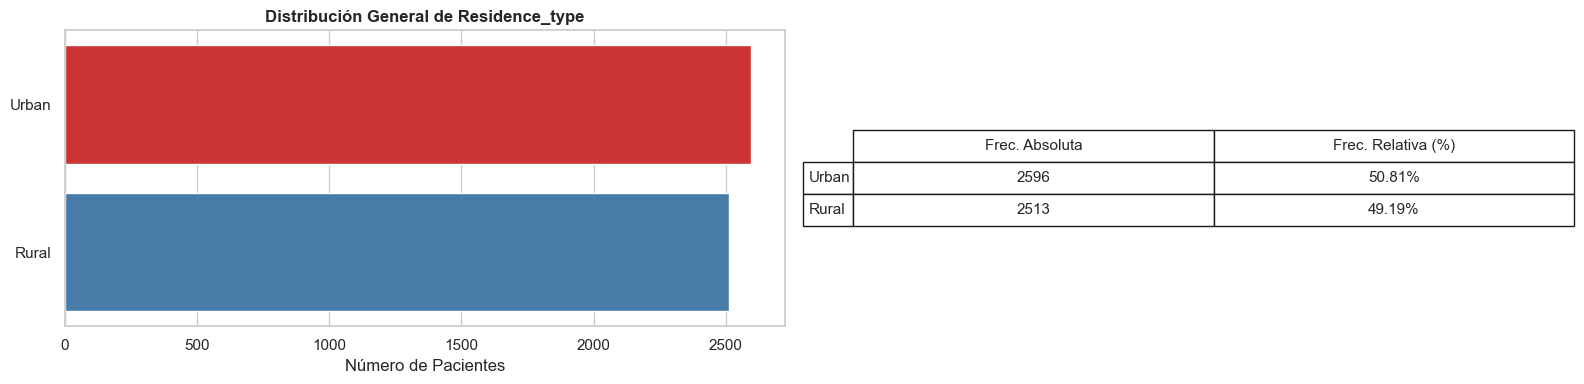

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14896\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


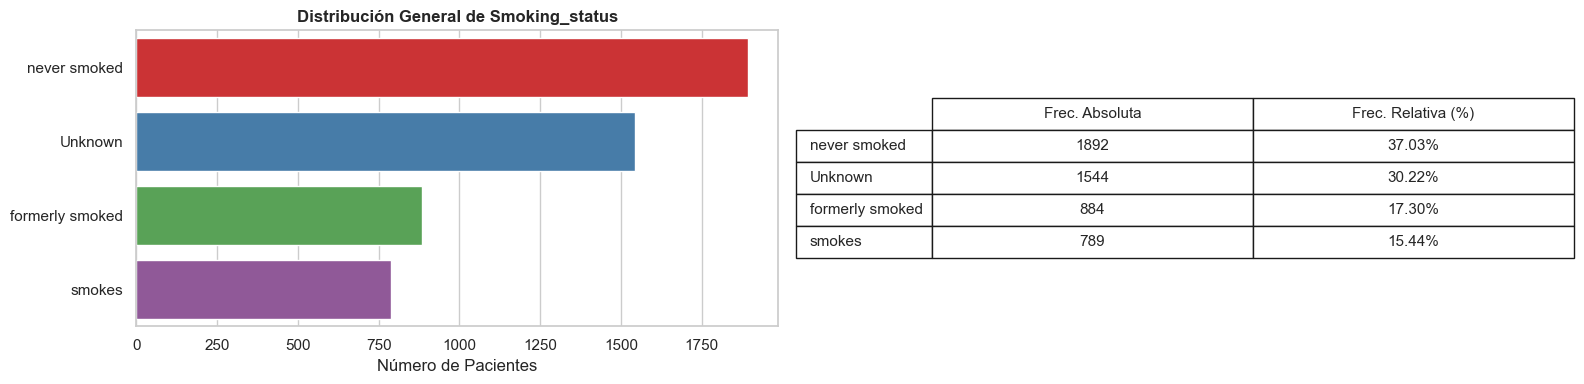

In [4]:
# Lista de variables categóricas
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    # 1. Crear el contenedor (1 fila, 2 columnas)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    # 2. Gráfico de Barras Laterales (Frecuencia Absoluta)
    # No usamos 'hue' porque estamos analizando la variable por sí sola
    sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)
    ax1.set_title(f'Distribución General de {col.capitalize()}', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Número de Pacientes')
    ax1.set_ylabel('')
    
    # 3. Cálculo de Tabla de Frecuencias
    abs_freq = df[col].value_counts()
    rel_freq = df[col].value_counts(normalize=True) * 100
    
    stats_df = pd.DataFrame({
        'Frec. Absoluta': abs_freq,
        'Frec. Relativa (%)': rel_freq.map('{:.2f}%'.format)
    })
    
    # 4. Dibujar la tabla al lado
    ax2.axis('off')
    tabla = ax2.table(cellText=stats_df.values, 
                      colLabels=stats_df.columns, 
                      rowLabels=stats_df.index,
                      loc='center', 
                      cellLoc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(11)
    tabla.scale(1.0, 2.0)
    
    plt.tight_layout()
    plt.show()

###  **Relación de Variables Categóricas con el Infarto**
Analizaremos cómo influyen las condiciones médicas previas y los hábitos en la incidencia del infarto.

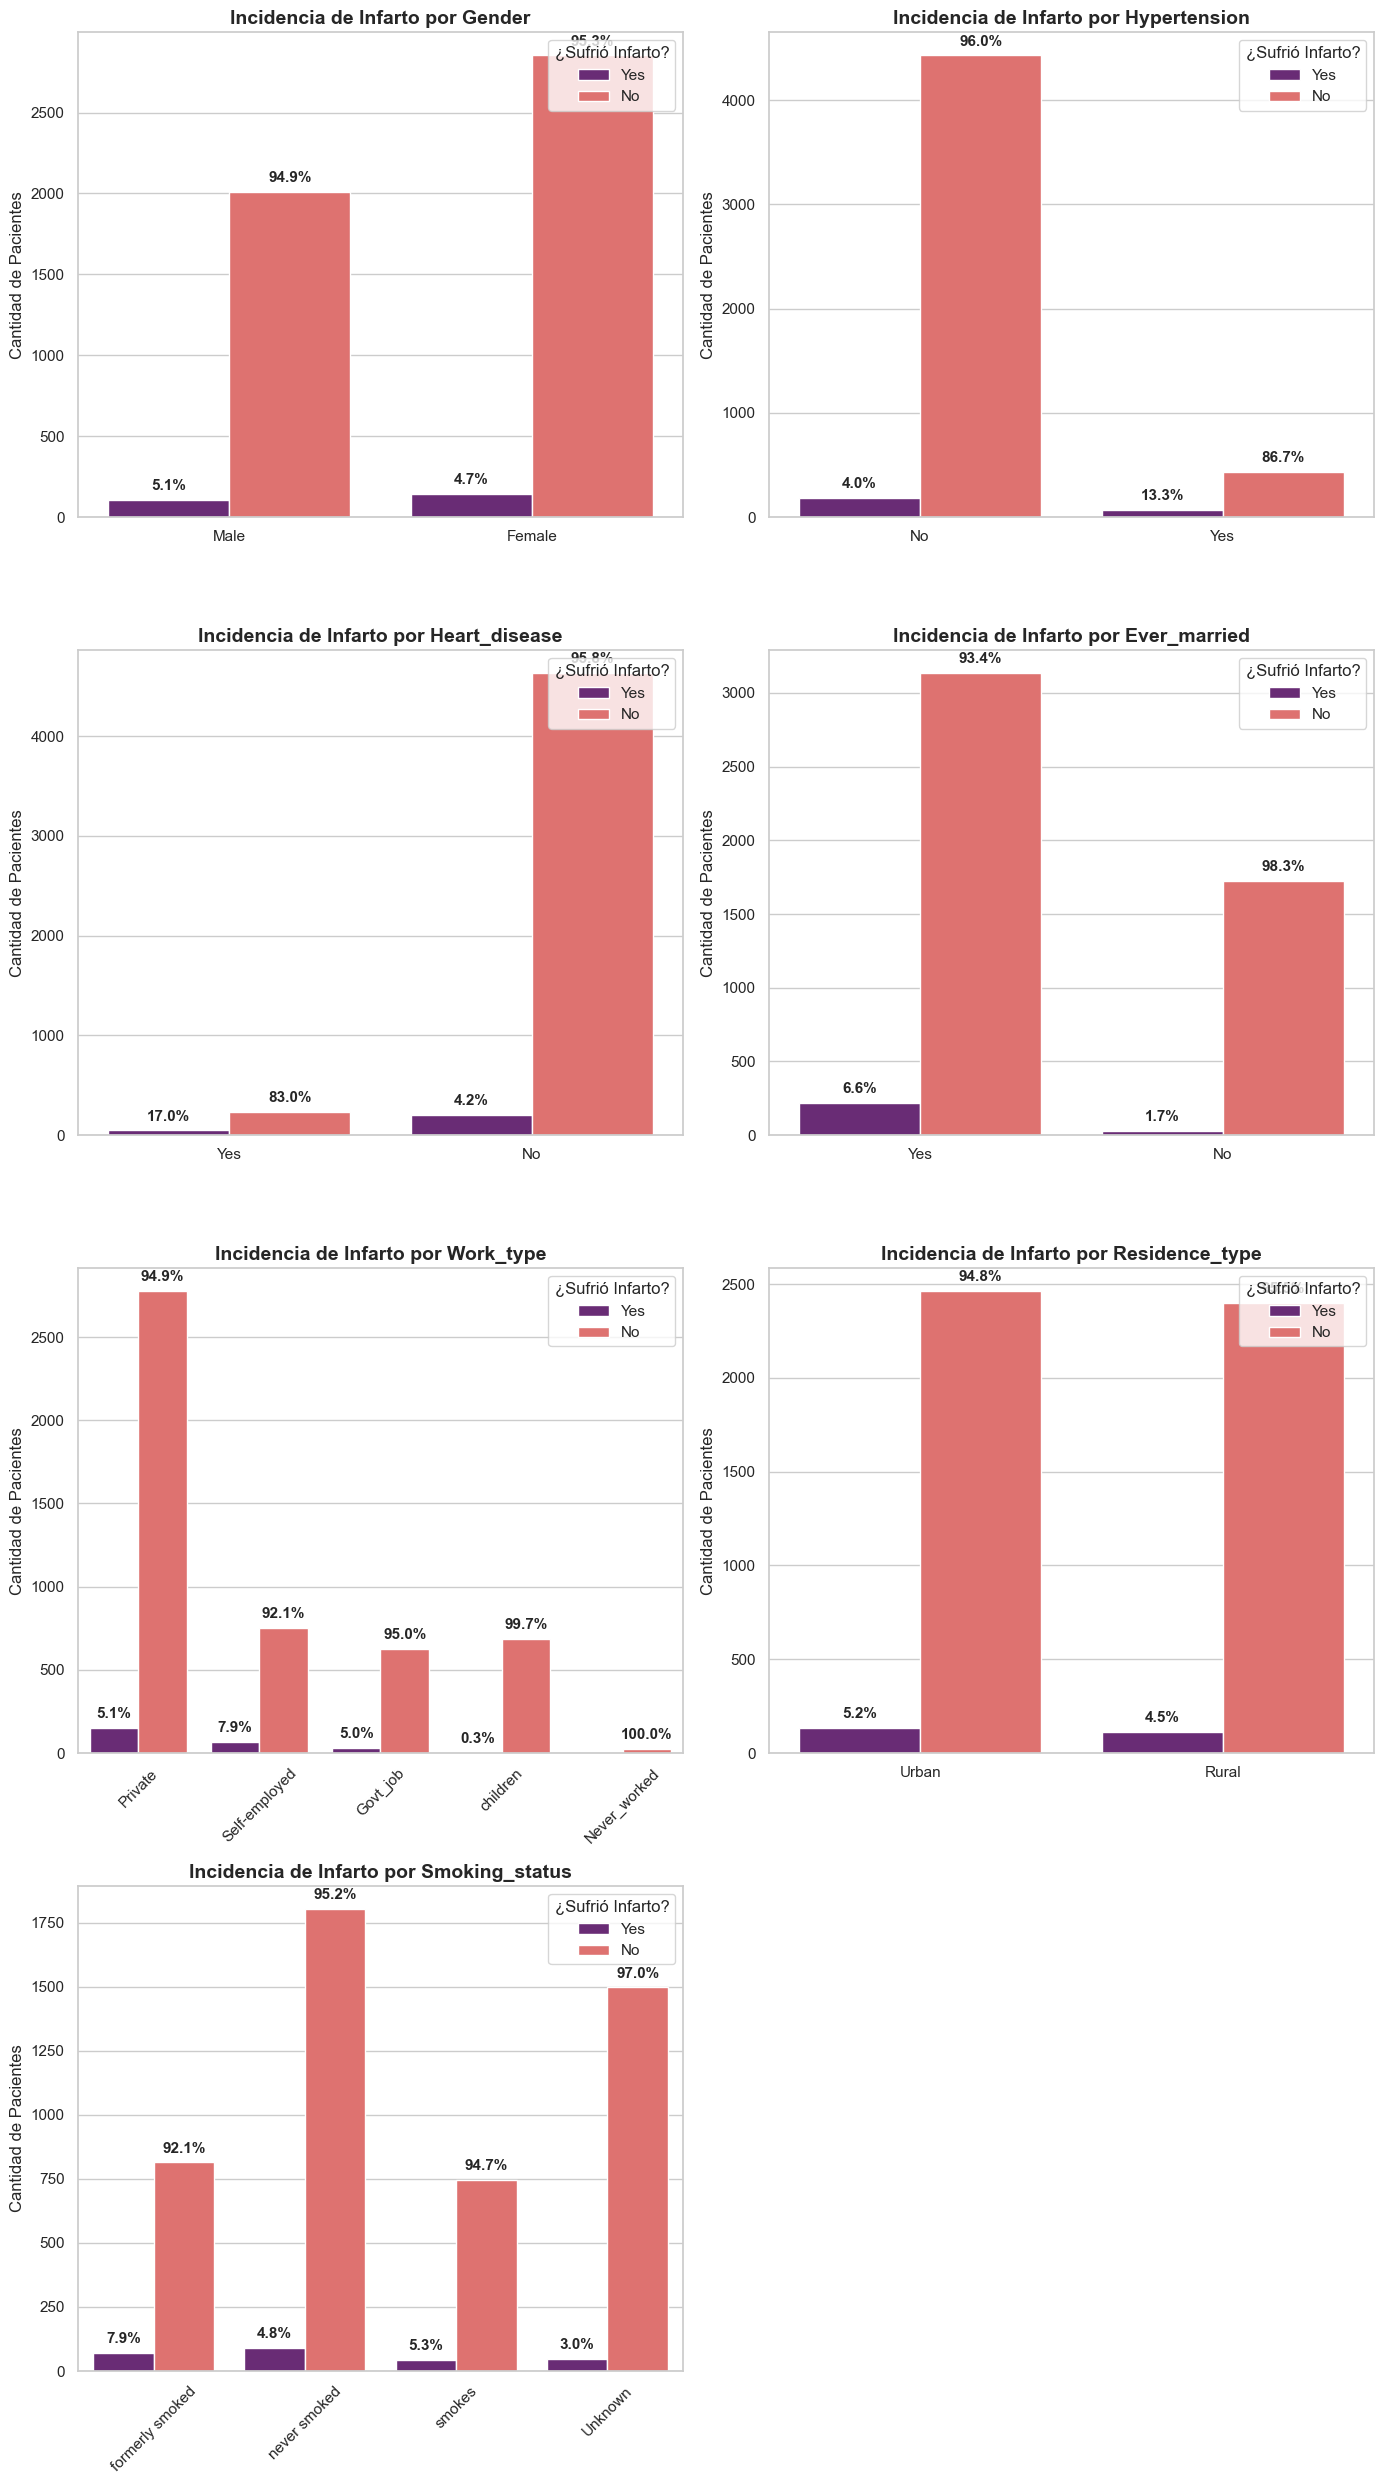

In [5]:
# Lista de variables a analizar
cols_to_plot = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                'work_type', 'Residence_type', 'smoking_status']

# Diccionario de mapeo para mejorar la legibilidad del eje X
# Esto transforma 0 -> No y 1 -> Yes para las variables clínicas
map_values = {0: 'No', 1: 'Yes'}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 25))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    # 1. Crear una copia temporal de la columna para no alterar el df original
    # Si la variable es numérica (0/1), la mapeamos a No/Yes
    temp_series = df[col].map(map_values).fillna(df[col])
    
    # 2. Crear el gráfico con la serie mapeada
    ax = sns.countplot(x=temp_series, hue=df['stroke'].map(map_values), palette='magma', ax=axes[i])
    
    axes[i].set_title(f'Incidencia de Infarto por {col.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de Pacientes')
    axes[i].legend(title='¿Sufrió Infarto?', loc='upper right')
    
    # 3. Calcular totales para porcentajes sobre la serie mapeada
    totals = temp_series.value_counts()
    
    # 4. Añadir etiquetas de porcentaje
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            # Obtener la etiqueta del eje X (ej. "No" o "Yes")
            x_pos = p.get_x() + p.get_width() / 2
            label_idx = int(round(x_pos))
            label_text = ax.get_xticklabels()[label_idx].get_text()
            
            # Calcular porcentaje relativo a esa categoría
            total_category = totals[label_text]
            percentage = f'{100 * height / total_category:.1f}%'
            
            # Anotación
            ax.annotate(percentage, 
                        (x_pos, height), 
                        ha='center', va='center', 
                        fontsize=11, fontweight='bold',
                        xytext=(0, 10), 
                        textcoords='offset points')

    if col in ['work_type', 'smoking_status']:
        axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

## **Ingeniería de Características: Reagrupación de Categorías 🛠️**

Tras el análisis visual y estadístico, se procede a transformar las variables categóricas para mejorar la robustez del modelo y reducir el ruido.

### 1. Integración de `work_type`: Never_worked → Private
* **Acción:** Se reclasifican los registros de la categoría `Never_worked` dentro de la categoría `Private`.
* **Justificación:** La categoría `Never_worked` cuenta con una representación menor al 0.5% en el dataset. En estadística, categorías con frecuencia ultra-baja pueden generar inestabilidad en los algoritmos. Se elige `Private` por ser la categoría mayoritaria (moda), permitiendo conservar los registros (incluyendo posibles casos de infarto) sin sesgar grupos más específicos como `children` o `Govt_job`.

### 2. Creación de la categoría `Ever Smoked`
* **Acción:** Se fusionan las categorías `smokes` (fumador actual) y `formerly smoked` (exfumador) en una nueva etiqueta denominada `ever_smoked`.
* **Justificación:** Clínicamente, el riesgo cardiovascular se ve afectado por la exposición acumulada al tabaco. Al unir ambos grupos, consolidamos la "señal de riesgo" frente al grupo de control (`never smoked`). La categoría `Unknown` se mantiene intacta para preservar el 30% de los datos que, aunque desconocidos, podrían contener patrones de riesgo importantes que no queremos diluir.

In [7]:
# 1. Creamos una copia de seguridad para trabajar
df_transformed = df.copy()

# 2. Transformación de work_type
# Integramos los que nunca han trabajado en la categoría mayoritaria
df_transformed['work_type'] = df_transformed['work_type'].replace('Never_worked', 'Private')

# 3. Creación de 'ever_smoked'
# Unificamos fumadores y exfumadores en un solo grupo de riesgo
df_transformed['smoking_status'] = df_transformed['smoking_status'].replace(['smokes', 'formerly smoked'], 'ever_smoked')

# 4. Verificación de los cambios
print("--- Verificación de Transformaciones ---")
print(f"Categorías en work_type: {df_transformed['work_type'].unique()}")
print(f"Categorías en smoking_status: {df_transformed['smoking_status'].unique()}")
print(f"Categorías en gender: {df_transformed['gender'].unique()}")
print(f"\nTotal de registros de infarto preservados: {df_transformed['stroke'].sum()}")

# 5. Guardar el nuevo dataset para la siguiente fase (Variables Numéricas)
df_transformed.to_csv('dataset/healthcare-dataset-stroke-transformed.csv', index=False)
print("\n✅ Archivo 'healthcare-dataset-stroke-transformed.csv' guardado con éxito.")

--- Verificación de Transformaciones ---
Categorías en work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Categorías en smoking_status: ['ever_smoked' 'never smoked' 'Unknown']
Categorías en gender: ['Male' 'Female']

Total de registros de infarto preservados: 249

✅ Archivo 'healthcare-dataset-stroke-transformed.csv' guardado con éxito.
